# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A   D    DMG      H   MIT    GAME
0   0   7  3   6   5933   1068  6199  DEFEAT
    1   7  0  10   3601    747     0  DEFEAT
    2   9  1   6   4352      0     0  DEFEAT
    3   7  7   2   2332   6325     0  DEFEAT
    4   6  4   2   3410   5979   606  DEFEAT
...    .. ..  ..    ...    ...   ...     ...
425 5  12  7   6  11643      0  5529  DEFEAT
    6   6  5  14   5252    201   980  DEFEAT
    7  13  0  14   8647      0   367  DEFEAT
    8   4  5   2   2380   6053   177  DEFEAT
    9  14  8  10   7607  11575     0  DEFEAT

[4260 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4260 entries, (0, 0) to (425, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4260 non-null   int64 
 1   A       4260 non-null   int64 
 2   D       4260 non-null   int64 
 3   DMG     4260 non-null   int64 
 4   H       4260 non-null   int64 
 5   MIT     4260 non-null   int64 
 6   GAME    4260 non-null   object
dtypes: int64(6), object(1)
memory usage: 265.3+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,13.541315,7.144836,6.348122,6144.173709,3831.865493,2331.052347
std,9.589260,8.127038,3.892870,4324.358800,5424.698381,4566.307513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2694.750000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5356.500000,701.000000,318.500000
75%,20.000000,11.000000,9.000000,9030.000000,7320.250000,1882.000000
max,58.000000,54.000000,21.000000,26666.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


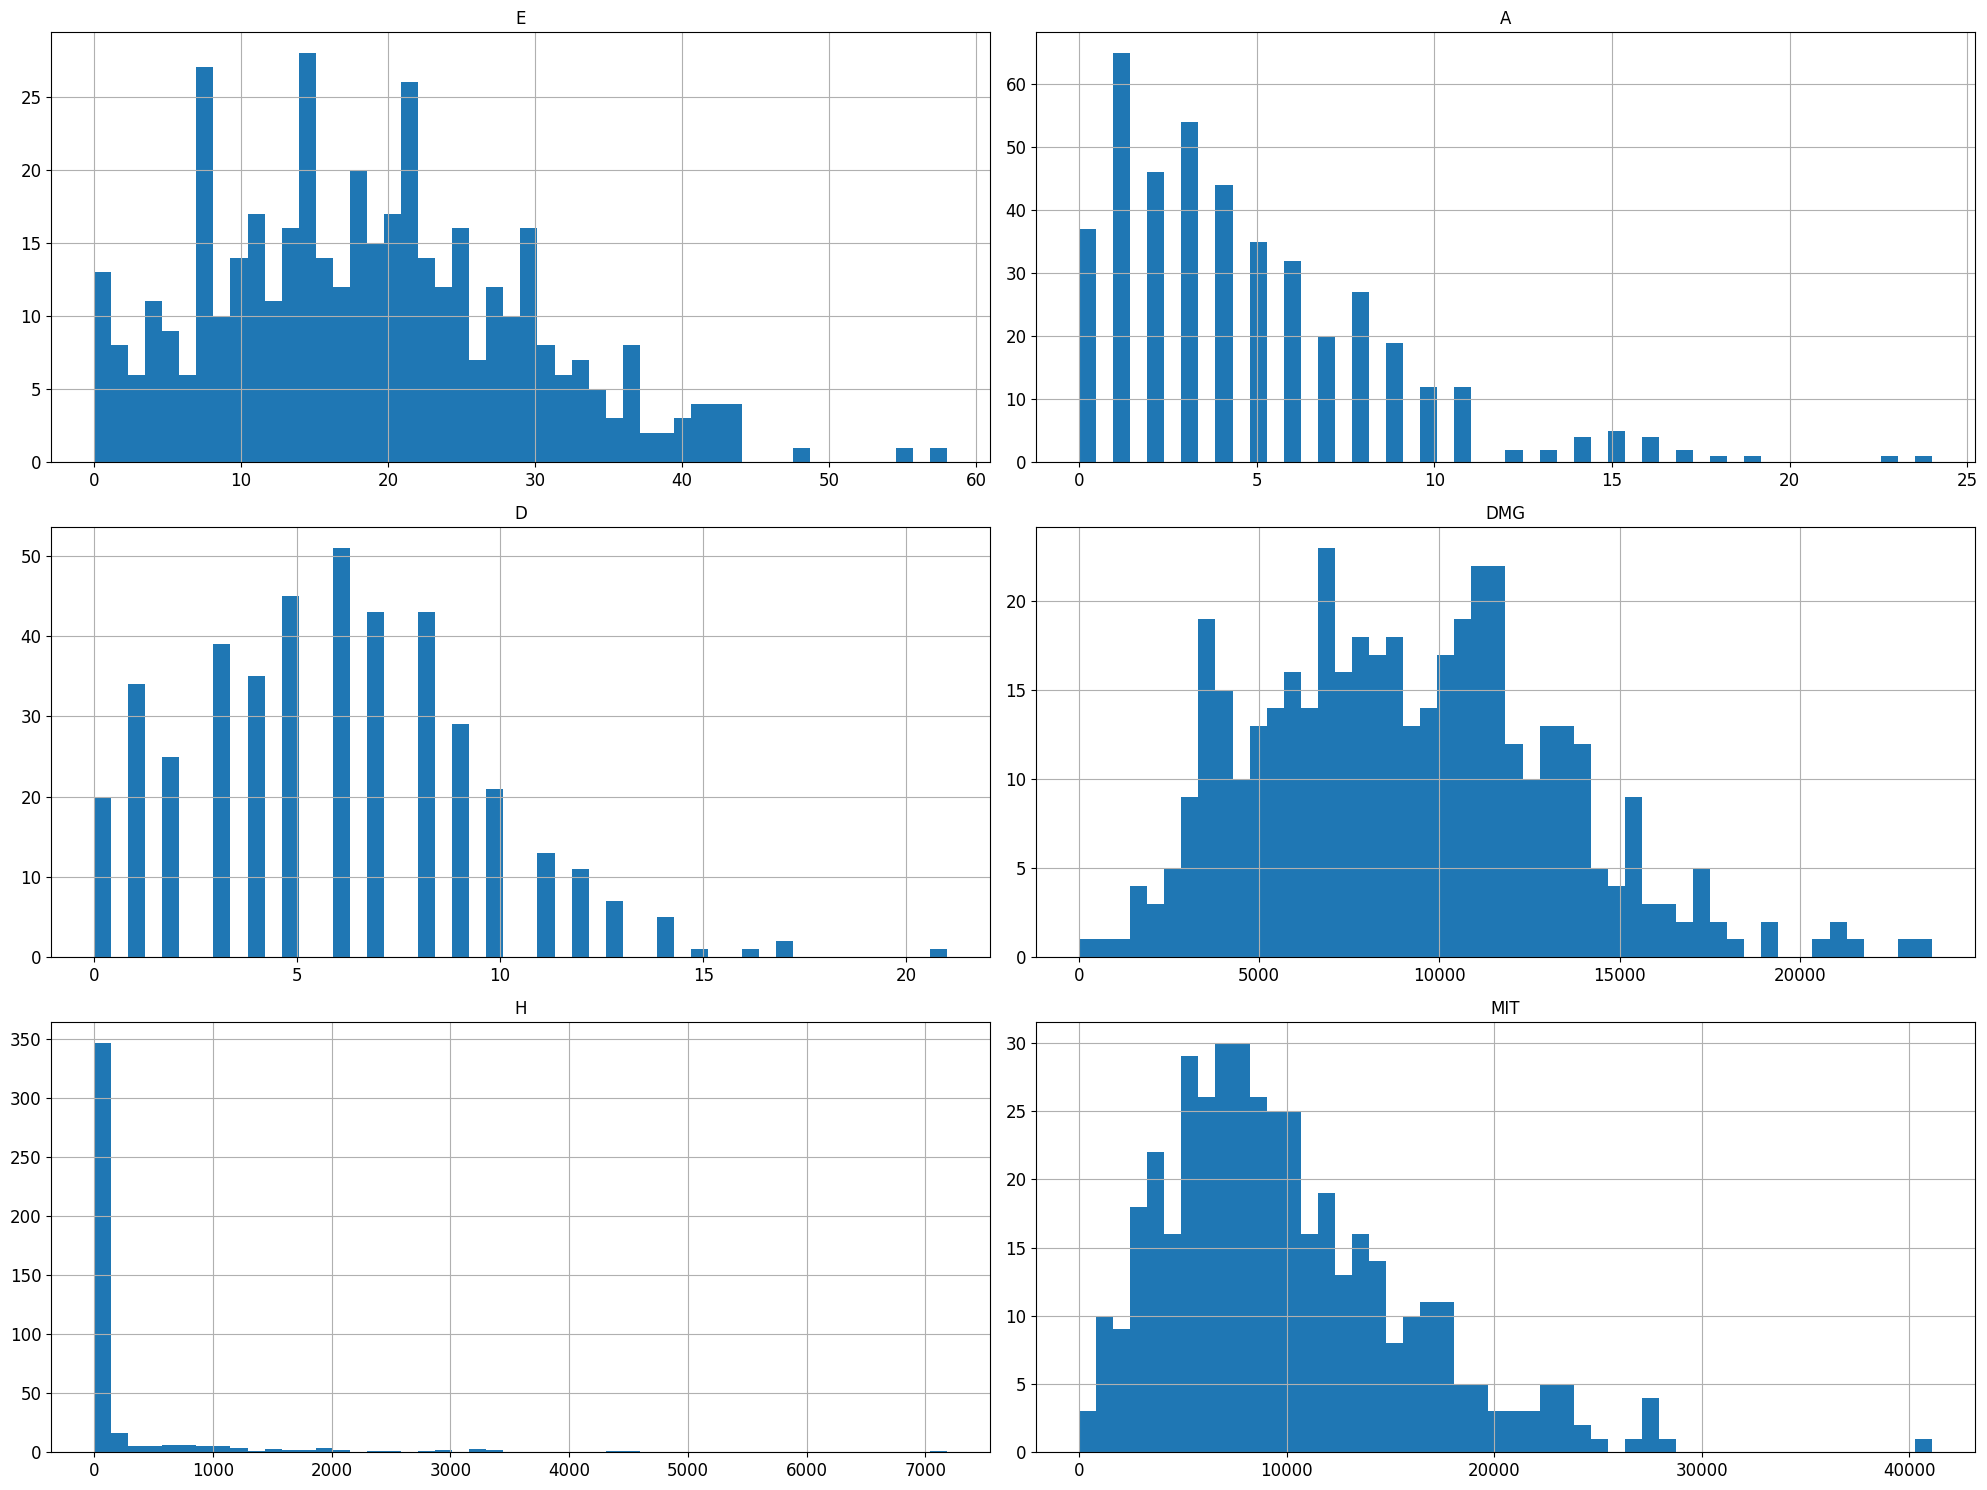

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


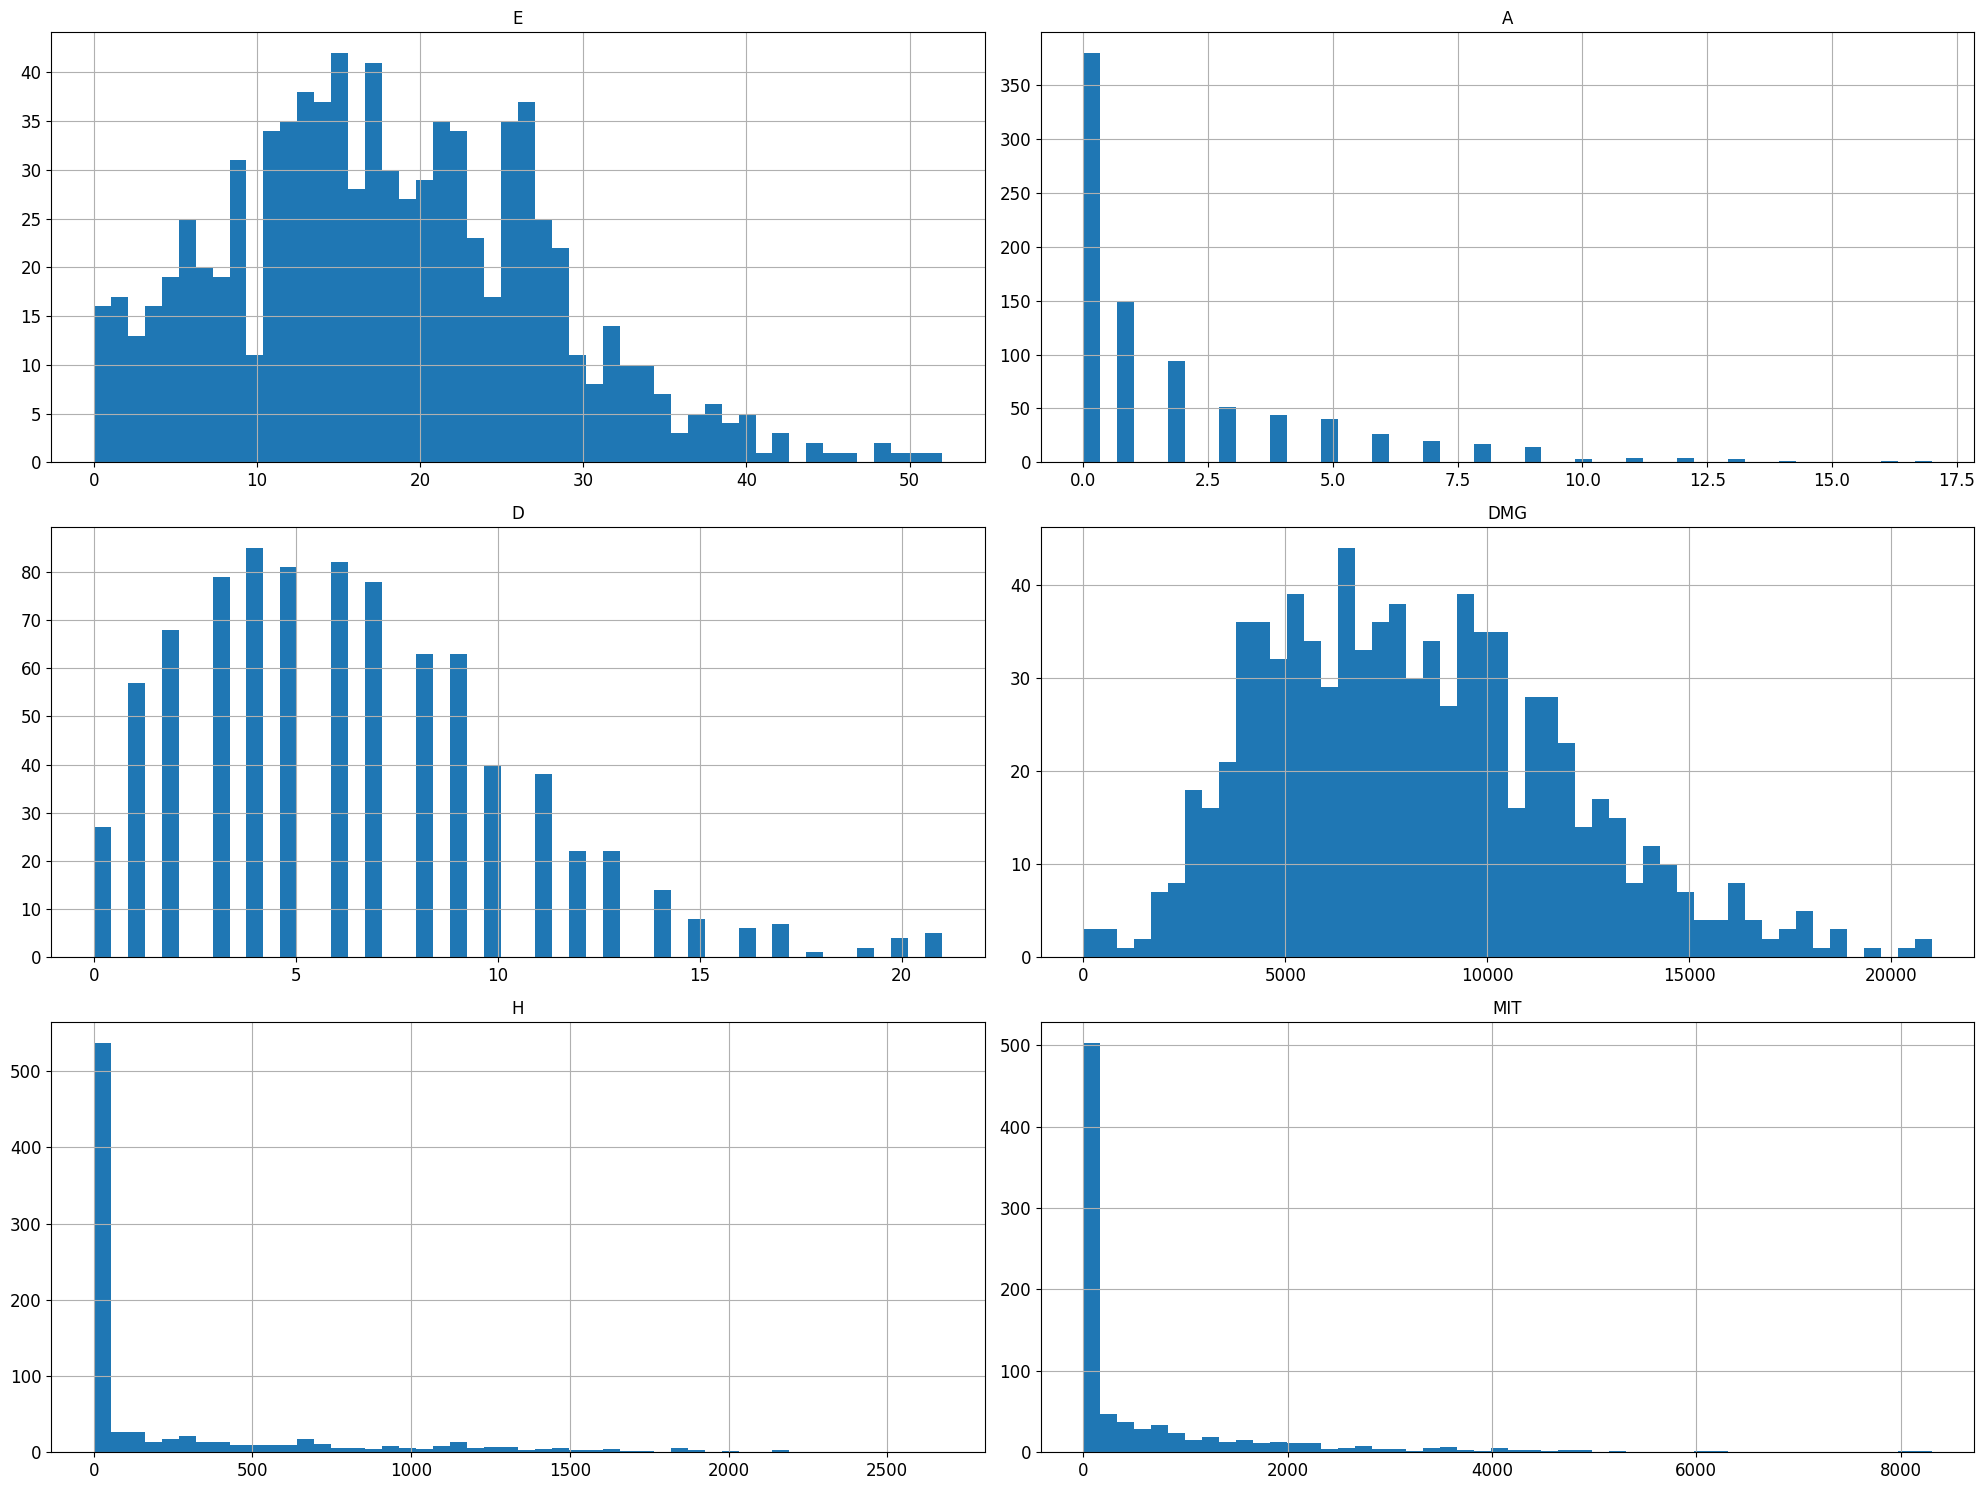

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


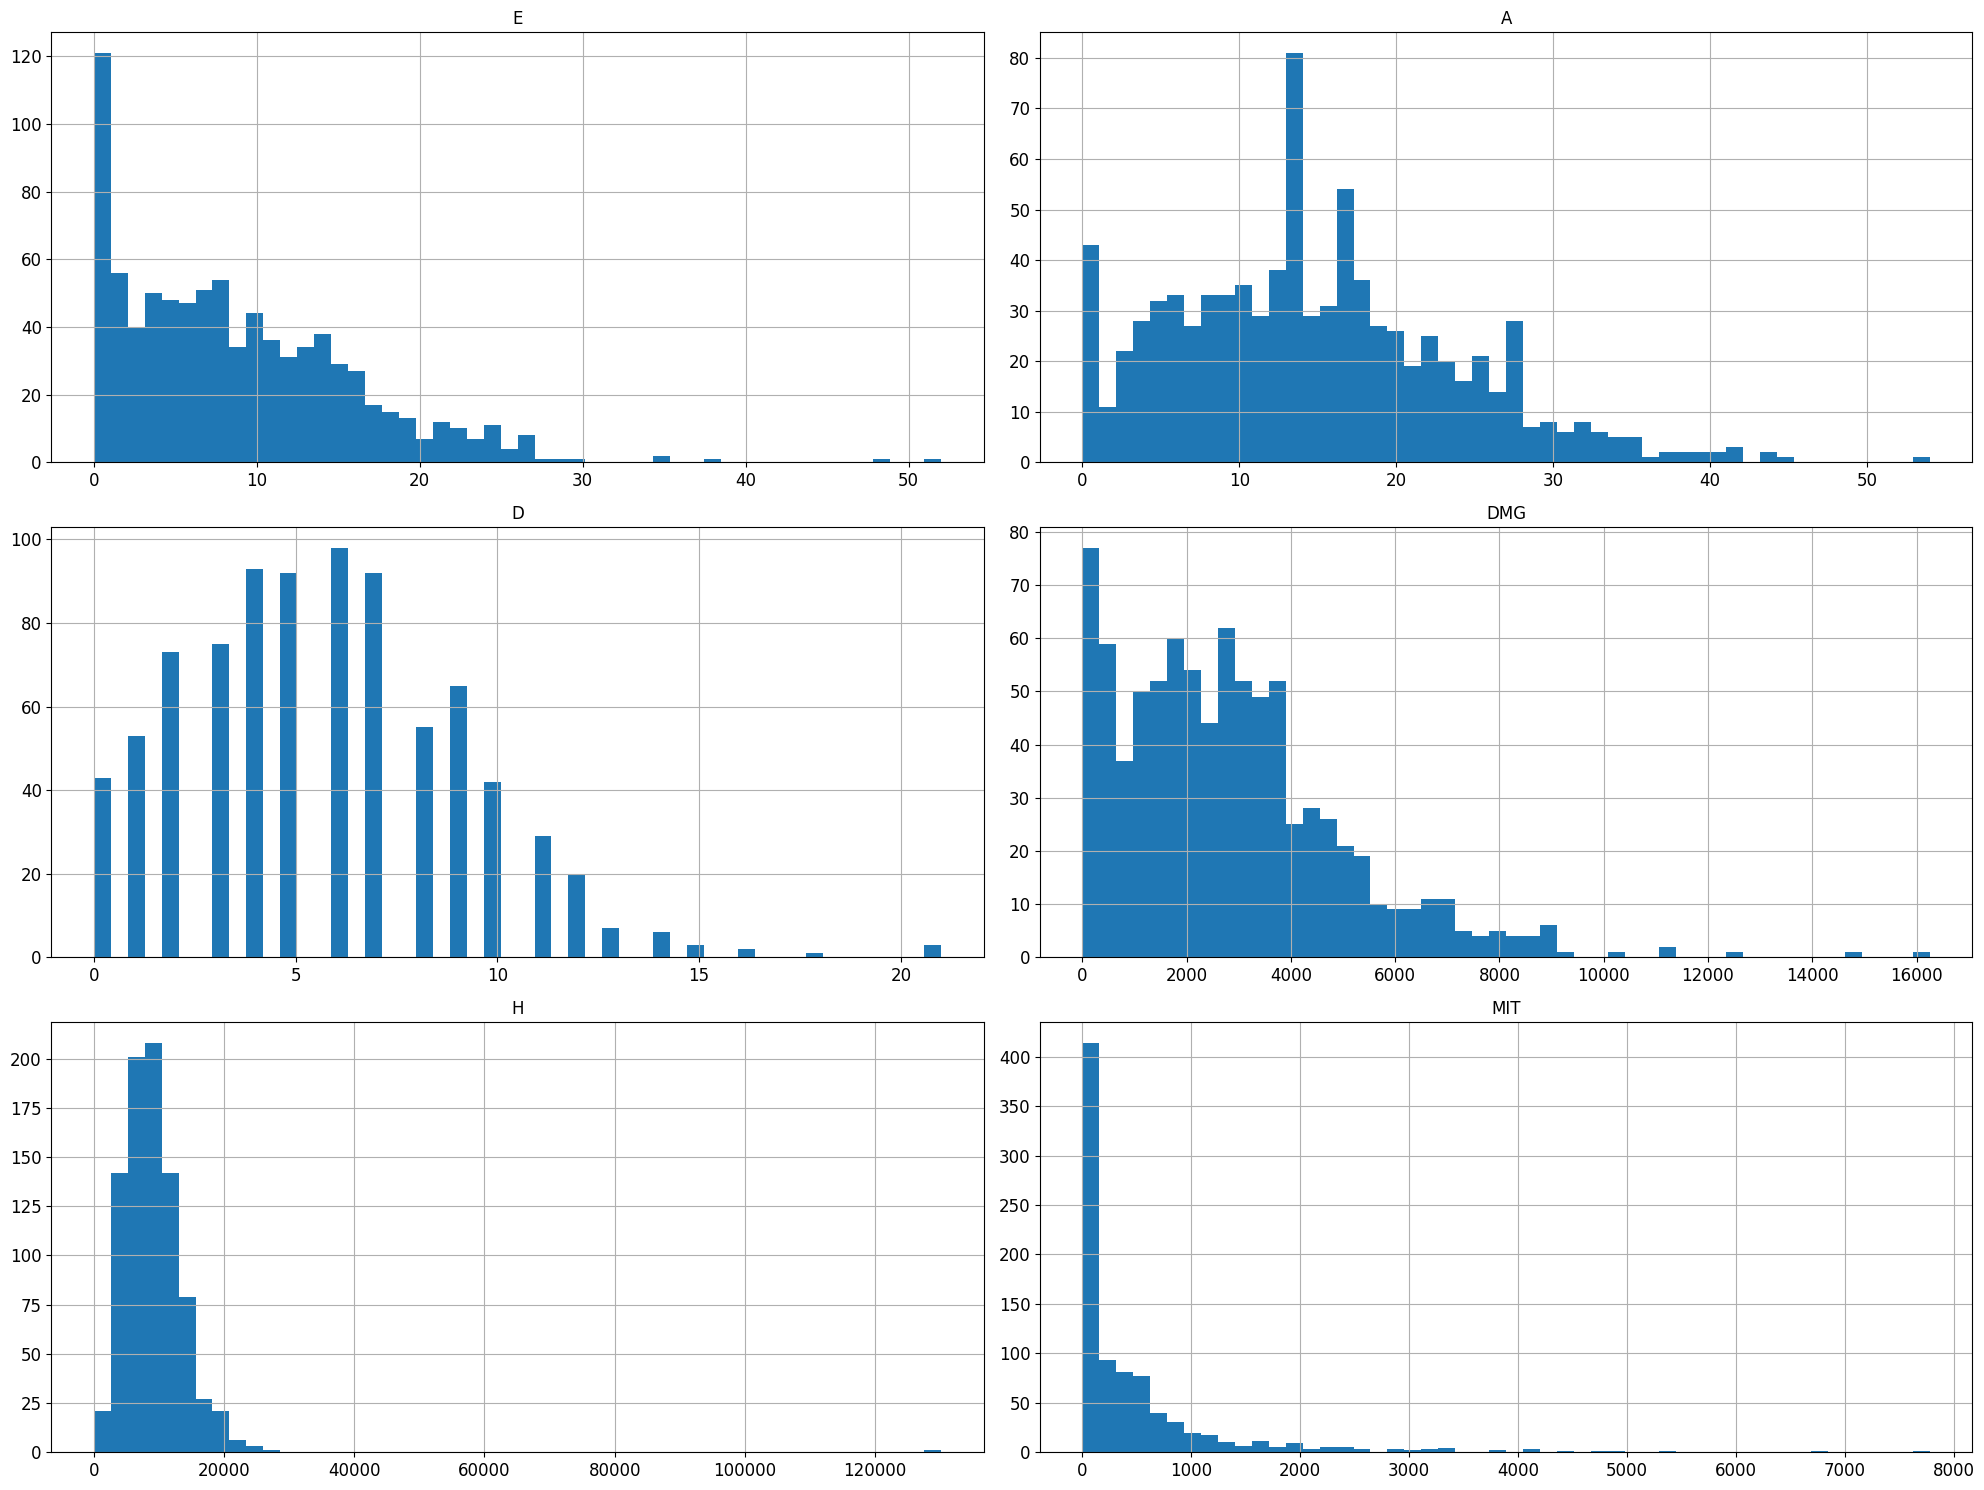

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A  D    DMG      H    MIT     GAME
44  0  29   3  4  14136      0  13567   DEFEAT
    1  29   0  7  11881      0      0   DEFEAT
    2  16   1  2   9094    219     77   DEFEAT
    3   2  24  7    264  11754    115   DEFEAT
    4  16  19  6   4752   7519   1244   DEFEAT
...    ..  .. ..    ...    ...    ...      ...
189 5  13   1  2   6656      0   3427  VICTORY
    6  16   3  1   7339   1186      0  VICTORY
    7  14   0  5   4331      0    926  VICTORY
    8  12  12  0   2538   6126    162  VICTORY
    9   9   6  1   4034   4950      0  VICTORY

[4260 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
44  0  0.500000  0.055556  0.190476  0.530113  0.000000  0.324189
    1  0.500000  0.000000  0.333333  0.445549  0.000000  0.000000
    2  0.275862  0.018519  0.095238  0.341034  0.001682  0.001840
    3  0.034483  0.444444  0.333333  0.009900  0.090295  0.002748
    4  0.275862  0.351852  0.285714  0.178204  0.057761  0.029726
...         ...       ...       ...       ...       ...       ...
189 5  0.224138  0.018519  0.095238  0.249606  0.000000  0.081890
    6  0.275862  0.055556  0.047619  0.275219  0.009111  0.000000
    7  0.241379  0.000000  0.238095  0.162417  0.000000  0.022127
    8  0.206897  0.222222  0.000000  0.095177  0.047060  0.003871
    9  0.155172  0.111111  0.047619  0.151279  0.038026  0.000000

[4260 rows x 6 columns]

In [12]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(426, 60)
(426,)


In [13]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.93023256, 0.87058824, 0.97647059, 0.84705882, 0.89411765])

In [14]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.53488372, 0.55294118, 0.55294118, 0.56470588, 0.56470588])

In [15]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.88372093, 0.84705882, 0.92941176, 0.82352941, 0.87058824])

In [16]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(RidgeClassifierCV(), 0.9060465116279071),
 (ExtraTreesClassifier(n_jobs=-1), 0.9037209302325582),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9036935704514365),
 (NuSVC(), 0.9036935704514365),
 (LogisticRegression(n_jobs=-1), 0.9013406292749659),
 (NearestCentroid(), 0.8989876880984953),
 (SVC(), 0.8989876880984952),
 (RidgeClassifier(), 0.8966347469220246),
 (LinearSVC(dual='auto'), 0.8943091655266759),
 (RandomForestClassifier(n_jobs=-1), 0.8919562243502053),
 (KNeighborsClassifier(n_jobs=-1), 0.8848700410396717),
 (HistGradientBoostingClassifier(), 0.88265389876881),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8803556771545828),
 (MLPClassifier(max_iter=3200), 0.8778659370725034),
 (GradientBoostingClassifier(), 0.8755677154582763),
 (Perceptron(n_jobs=-1), 0.8637482900136799),
 (SGDClassifier(n_jobs=-1), 0.8566621067031462),
 (AdaBoostClassifier(), 0.852065663474692),
 (BaggingClassifier(n_jobs=-1), 0.8310259917920655),
 (ExtraTreeClassifier(), 0.795923392612859),
 (Decis

In [17]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [18]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.2f}%')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 29.78%
죽음: 28.16%
도움: 19.62%
피해: 9.00%
치유: 6.96%
경감: 6.48%

**1인 돌격 특성 중요도**
죽음: 9.23%
처치: 7.86%
도움: 4.90%
피해: 1.87%
경감: 1.37%
치유: 0.97%

**1인 공격 특성 중요도**
처치: 7.48%
죽음: 4.14%
피해: 2.04%
도움: 1.68%
치유: 1.41%
경감: 1.14%

**1인 지원 특성 중요도**
도움: 5.68%
죽음: 5.32%
처치: 3.48%
치유: 1.59%
피해: 1.52%
경감: 1.42%

**1인 역할 중요도**
돌격: 26.20%
지원: 19.02%
공격: 17.88%


In [19]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -10):
    defeat_i = defeat[i:i + 10]
    print(f'DEFEAT ({i // 10 + 1})')
    print(defeat_i)
    
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (202)
       E   A  D    DMG      H    MIT     GAME
2010   9   2  8   7480      0  15269   DEFEAT
2011   8   1  9   8072     88    327   DEFEAT
2012  13   1  9   8169    140    134   DEFEAT
2013   6   9  7   3581   6372      0   DEFEAT
2014   8   8  9   2201   8732    620   DEFEAT
2015  37   5  4  13073      0   8404  VICTORY
2016  15   6  7   4252     96    537  VICTORY
2017  23   3  7   7475    107    826  VICTORY
2018  10  31  1   1927   9509    701  VICTORY
2019  10  35  2   1978  12573      0  VICTORY
TEAM 1: 0.73 0.80 0.92 0.73 0.65
TEAM 2: 1.27 1.02 1.26 1.30 1.32

DEFEAT (201)
       E   A   D    DMG      H    MIT     GAME
2000  27   6   6  15825      0  24966   DEFEAT
2001  22   3  11  10134    483   2084   DEFEAT
2002  27   0  11  14168    907   1439   DEFEAT
2003  24  21   8   8770  20322      0   DEFEAT
2004  12  27  11   5294  11536      0   DEFEAT
2005  31   6   9  15874      0  23622  VICTORY
2006  22   0  12  11206    174    766  VICTORY
2007  31   7  12  15251  

In [20]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -10):
    victory_i = victory[i:i + 10]
    print(f'VICTORY ({i // 10 + 1})')
    print(victory_i)
    
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (224)
       E   A   D    DMG      H    MIT     GAME
2230  23   4   2  15122      0  14674  VICTORY
2231  20   0   7  10454    127   2282  VICTORY
2232  31   0   4  13615      0      0  VICTORY
2233  15  21   7   4044  10886   1738  VICTORY
2234   2  29   3    204  12610   1166  VICTORY
2235  12   7   6  11643      0   5529   DEFEAT
2236   6   5  14   5252    201    980   DEFEAT
2237  13   0  14   8647      0    367   DEFEAT
2238   4   5   2   2380   6053    177   DEFEAT
2239  14   8  10   7607  11575      0   DEFEAT
TEAM 1: 1.15 1.18 1.59 1.10 1.23
TEAM 2: 0.85 0.52 0.71 0.90 0.78

VICTORY (223)
       E   A  D   DMG     H    MIT     GAME
2220  10   3  0  6948     0  10687  VICTORY
2221   9   0  5  3476     0     70  VICTORY
2222   8   0  3  4878   295      0  VICTORY
2223   7   5  1  2842  3560    394  VICTORY
2224   0  10  2     0  3724      0  VICTORY
2225   2   0  5  2149   533   4882   DEFEAT
2226   9   0  4  3752     0     40   DEFEAT
2227   3   1  1  3077   202    766  

In [21]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=[total_features]))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(3, 'softmax'))
model.summary()

2023-11-23 16:02:49.764458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 16:02:50.910643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 16:02:50.923894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 16:02:50.924206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 48703 (190.25 KB)
Trainable params: 48703 (190.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers, callbacks

encoder = preprocessing.LabelEncoder()
model.compile('sgd', 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(
    X,
    encoder.fit_transform(y),
    epochs=100,
    verbose=2,
    callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    validation_split=.1
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/100


2023-11-23 16:02:51.710511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-23 16:02:51.721839: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x90beec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-23 16:02:51.721877: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-11-23 16:02:51.740319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-23 16:02:51.748844: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-23 16:02:51.784590: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 - 1s - loss: 1.1125 - accuracy: 0.2376 - val_loss: 1.0405 - val_accuracy: 0.4419 - 793ms/epoch - 66ms/step
Epoch 2/100
12/12 - 0s - loss: 0.9963 - accuracy: 0.5352 - val_loss: 0.9529 - val_accuracy: 0.5349 - 51ms/epoch - 4ms/step
Epoch 3/100
12/12 - 0s - loss: 0.9221 - accuracy: 0.5274 - val_loss: 0.8927 - val_accuracy: 0.5349 - 55ms/epoch - 5ms/step
Epoch 4/100
12/12 - 0s - loss: 0.8692 - accuracy: 0.5326 - val_loss: 0.8464 - val_accuracy: 0.5349 - 54ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.8271 - accuracy: 0.5405 - val_loss: 0.8083 - val_accuracy: 0.5814 - 50ms/epoch - 4ms/step
Epoch 6/100
12/12 - 0s - loss: 0.7929 - accuracy: 0.5692 - val_loss: 0.7765 - val_accuracy: 0.6977 - 52ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.7633 - accuracy: 0.6684 - val_loss: 0.7487 - val_accuracy: 0.7442 - 51ms/epoch - 4ms/step
Epoch 8/100
12/12 - 0s - loss: 0.7381 - accuracy: 0.6945 - val_loss: 0.7242 - val_accuracy: 0.7442 - 47ms/epoch - 4ms/step
Epoch 9/100
12/12 - 0s - l

(0.2495514154434204, 0.9069767594337463)